# Week 2 - Theory of Constrained Optimization
First and second order optimality conditions and how to apply them to determine the minimizers of constrained optimization problems.

## Exercise 1 - Quadratic Optimization
Consider the problem
$$
\begin{array}{ll}
\min _x & f(x)=3 x_1^2+2 x_1 x_2+x_1 x_3+2.5 x_2^2+2 x_2 x_3+2 x_3^2-8 x_1-3 x_2-3 x_3 \\
\text { s.t. } & x_1+x_3=3 \\
& x_2+x_3=0
\end{array}
$$

### 1.1.1 - Write the constraints in the form $c_i(x)=0$.

$$
c(x) =
\begin{bmatrix}
    c_1(x) \\
    c_2(x)
\end{bmatrix}
=
\begin{bmatrix}
    x_1 + x_3 - 3 \\
    x_2 + x_3
\end{bmatrix}
=
\begin{bmatrix}
    0 \\
    0
\end{bmatrix}
$$

### 1.1.2 Write the Lagrangian of this problem.

$$
\mathcal{L}(x, \mu)=f(x)-\mu^{T} c(x) =
f(x) - 
\begin{bmatrix} \mu_1 & \mu_2 \end{bmatrix}
\begin{bmatrix}
    c_1(x) \\
    c_2(x)
\end{bmatrix}
=
f(x) - \mu_1 c_1(x) - \mu_2 c_2(x)
$$

### 1.1.3 Write the first order optimality conditions for this problem.

First Order optimality conditions:
$$
\begin{aligned}
& \nabla_x L(x, \mu)=\nabla f(x)-\nabla c(x) \mu=0 \\
& c(x)=0
\end{aligned}
$$



$$
\nabla f(x) = 
\begin{bmatrix}
    6x_1 + 2x_2 + x_3 - 8 \\
    2x_1 + 5x_2 + 2x_3 - 3 \\
    x_1 + 2x_2 + 4x_3 - 3
\end{bmatrix}
$$
and
$$
\nabla c(x) =
\begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
    1 & 1
\end{bmatrix}
$$

Therefore the first order optimality (KKT) conditions are:

$$
\nabla_x L(x,\mu) = 
\begin{bmatrix}
    6x_1 + 2x_2 + x_3 - 8 - \mu_1 \\
    2x_1 + 5x_2 + 2x_3 - 3 - \mu_2 \\
    x_1 + 2x_2 + 4x_3 - 3 - \mu_1 - \mu_2
\end{bmatrix}
=
\begin{bmatrix}
    0 \\
    0 \\
    0
\end{bmatrix}
$$
and
$$
c(x) =
\begin{bmatrix}
    x_1 + x_3 - 3 \\
    x_2 + x_3
\end{bmatrix}
=
\begin{bmatrix}
    0 \\
    0
\end{bmatrix}
$$    

### 1.1.4 Find the optimal solution

In [1]:
from sympy import Eq, solve, symbols

# Redefine symbols for clarity in this context
x1, x2, x3, mu1, mu2 = symbols('x1 x2 x3 mu1 mu2')

# Define equations based on the given optimality conditions and constraints
eq1 = Eq(6*x1 + 2*x2 + x3 - 8 - mu1, 0)
eq2 = Eq(2*x1 + 5*x2 + 2*x3 - 3 - mu2, 0)
eq3 = Eq(x1 + 2*x2 + 4*x3 - 3 - mu1 - mu2, 0)
eq4 = Eq(x1 + x3 - 3, 0)
eq5 = Eq(x2 + x3, 0)

# Solve the system of equations
solution = solve((eq1, eq2, eq3, eq4, eq5), (x1, x2, x3, mu1, mu2))

solution


{mu1: 3, mu2: -2, x1: 2, x2: -1, x3: 1}

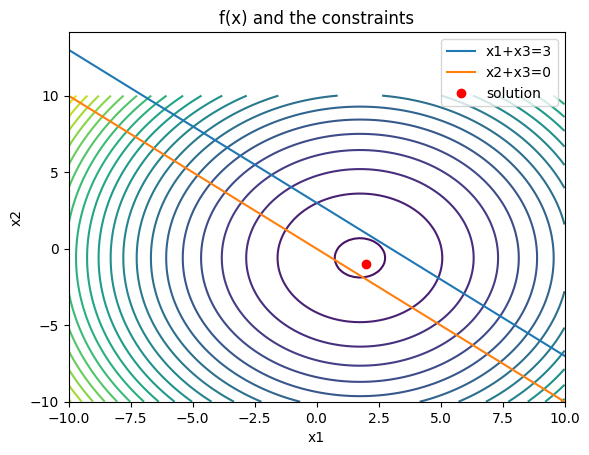

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 3*x[0]**2 + 2*x[0]*x[1] + x[0]*x[2] + 2.5*x[1]**2 + 2*x[1]*x[2] + 2*x[2]**2 - 8*x[0] - 3*x[1] - 3*x[2]

def c(x):
    return np.array([x[0]+x[2]-3, x[1]+x[2]])

#plot f and the constraints c
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
X, Y = np.meshgrid(x, y)
Z = f([X,Y,3-X])
plt.contour(X, Y, Z, 20)
plt.plot(x, 3-x, label='x1+x3=3')
plt.plot(x, -x, label='x2+x3=0')

#plot the solution
plt.plot(solution[x1], solution[x2], 'ro', label='solution')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('f(x) and the constraints')
plt.legend()
plt.show()

### 1.2.1 - Quadratic Form
Write the problem in the form
\begin{align*}
\begin{array}{ll}
\min _x & f(x)=\frac{1}{2} x^{T} H x+g^{T} x \\
\text { s.t. } & A^{T} x=b
\end{array}
\end{align*}

The Hessian $H$:

\begin{array}{rl}
f: \mathbb{R}^n \mapsto \mathbb{R} & f=f(x) \\
\nabla_x f & =\left[\begin{array}{c}
\frac{\partial f}{\partial x_1} \\
\vdots \\
\frac{\partial f}{\partial x_n}
\end{array}\right] \\
\nabla_{x x}^2 f & =\nabla_x\left(\nabla_x f\right)=\left[\begin{array}{lll}
\nabla_x\left(\frac{\partial f}{\partial x_1}\right) & \cdots & \nabla_x\left(\frac{\partial f}{\partial x_n}\right)
\end{array}\right] \\
& =\left[\begin{array}{ccc}
\frac{\partial}{\partial x_1}\left(\frac{\partial f}{\partial x_1}\right) & \cdots & \frac{\partial}{\partial x_1}\left(\frac{\partial f}{\partial x_n}\right) \\
\vdots & & \vdots \\
\frac{\partial}{\partial x_n}\left(\frac{\partial f}{\partial x_1}\right) & \cdots & \frac{\partial}{\partial x_n}\left(\frac{\partial f}{\partial x_n}\right)
\end{array}\right]=\left[\begin{array}{ccc}
\frac{\partial^2 f}{\partial x_1 \partial x_1} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\vdots & & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \cdots & \frac{\partial^2 f}{\partial x_n \partial x_n}
\end{array}\right]
\end{array}

so

$$
H =
\nabla^2 f(x) =
\begin{bmatrix}
    6 & 2 & 1 \\
    2 & 5 & 2 \\
    1 & 2 & 4
\end{bmatrix}
$$

and then we have:

$$
g = 
\begin{bmatrix}
    - 8 \\
    -3 \\
    -3
\end{bmatrix}
$$

and for the constraints

$$
A =
\begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
    1 & 1
\end{bmatrix}
\;\;
\text{ and }
\;\;
b =
\begin{bmatrix}
    3 \\
    0
\end{bmatrix}
$$

All together this gives:

\begin{align*}
\begin{array}{ll}
\min _x & f(x)=
    \frac{1}{2} 
    \begin{bmatrix}
        x1 & x2 & x3
    \end{bmatrix}
    \begin{bmatrix}
        6 & 2 & 1 \\
        2 & 5 & 2 \\
        1 & 2 & 4
    \end{bmatrix}
    \begin{bmatrix}
        x1 \\
        x2 \\
        x3
    \end{bmatrix}
    +
    \begin{bmatrix} 
        -8 & -3 & -3
    \end{bmatrix}
    \begin{bmatrix}
        x1 \\
        x2 \\
        x3
    \end{bmatrix}
     \\
\text { s.t. } & 
\begin{bmatrix} 
    1 & 0 & 1 \\
    0 & 1 & 1
\end{bmatrix}
\begin{bmatrix}
    x1 \\
    x2 \\
    x3
\end{bmatrix}
=
\begin{bmatrix}
    3 \\
    0
\end{bmatrix}
\end{array}
\end{align*}

### 1.2.2 - Describe $H, g, A, \text{ and } b$
* $H$ is the Hessian of $f$
* $g$ is the gradient vector, containing the linear term coefficients, which can be read from $f$
* $A$ is the constraint coefficient matrix
* $b$ is the right-hand-side constraint vector, containing the constant terms of the constraints

### 1.2.3 -  Write the Lagrangian

Generally we define the Lagrangian as
$$
\mathcal{L}(x, \lambda)=\frac{1}{2} x^{T} H x+g^{T} x+\lambda^{T}\left(b-A^{t} x\right)
$$
that means for this system we have
$$
\mathcal{L}(x, \lambda)=\frac{1}{2} x^{T} 
\begin{bmatrix}
    6 & 2 & 1 \\
    2 & 5 & 2 \\
    1 & 2 & 4
\end{bmatrix}
x+
\begin{bmatrix} 
    -8 & -3 & -3
\end{bmatrix}
x+\lambda^{T}\left(
    \begin{bmatrix}
        3 \\
        0
    \end{bmatrix}
    -
    \begin{bmatrix} 
        1 & 0 & 1 \\
        0 & 1 & 1
    \end{bmatrix}
    x
\right)
$$

### 1.2.3 - Use the first order optimality conditions

The general first order optimality conditions are:
$$
\begin{aligned}
& \nabla_x \mathcal{L}(x, \lambda)=H x+g-A \lambda=0 \\
& \nabla_y \mathcal{L}(x, \lambda)=-\left(A^{\prime} x-b\right)=0
\end{aligned}
$$

and so for this system the first order optimality conditions are:
$$
\begin{aligned}
&\nabla_x \mathcal{L}(x, \lambda) = 
\begin{bmatrix}
    6 & 2 & 1 \\
    2 & 5 & 2 \\
    1 & 2 & 4
\end{bmatrix}
x
+
\begin{bmatrix} 
    -8 \\
    -3 \\
    -3
\end{bmatrix}
-
\begin{bmatrix} 
    1 & 0 \\
    0 & 1 \\
    1 & 1
\end{bmatrix}
\lambda
= 0 \\
&\nabla_y \mathcal{L}(x, \lambda) = - \left(
    \begin{bmatrix} 
        1 & 0 & 1 \\
        0 & 1 & 1
    \end{bmatrix}
    x
    -
    \begin{bmatrix}
        3 \\
        0
    \end{bmatrix}
 \right)
 = 0
\end{aligned}
$$

### 1.2.4 - Find the minimizer using these optimality conditions

In [43]:
from sympy import Matrix, symbols, solve

# Define symbols for x and lambda
x1, x2, x3, lambda1, lambda2 = symbols('x1 x2 x3 lambda1 lambda2')

# Define matrices and vectors
H = Matrix([[6, 2, 1], [2, 5, 2], [1, 2, 4]])
g = Matrix([-8, -3, -3])
A = Matrix([[1, 0, 1], [0, 1, 1]])
b = Matrix([3, 0])
lambda_vector = Matrix([lambda1, lambda2])

# System of equations from the first order conditions
# Hx + g - A.T*lambda = 0 and Ax - b = 0
eq1 = H*Matrix([x1, x2, x3]) + g - A.T*lambda_vector
eq2 = A*Matrix([x1, x2, x3]) - b

# Solve the system
solution = solve((eq1, eq2), (x1, x2, x3, lambda1, lambda2))

solution


{lambda1: 3, lambda2: -2, x1: 2, x2: -1, x3: 1}

### 1.2.5 - Use sufficient conditions to prove that the point found is a minimizer

We can see that $H = \nabla^2 f(x) > 0$ is true since $H$ is positive definite

For $\nabla f(x) = 0$ we can evaluate the solution in the gradient.

In [49]:
import numpy as np

# Define the solution and Lagrange multipliers
x_star = np.array([2, -1, 1])
lambda_star = np.array([3, -2])

# Define the gradient of the objective function
g = np.array([6*x_star[0] + 2*x_star[1] + x_star[2] - 8,
              2*x_star[0] + 5*x_star[1] + 2*x_star[2] - 3,
              x_star[0] + 2*x_star[1] + 4*x_star[2] - 3])

# Define the Hessian matrix of the objective function
H = np.array([[6, 2, 1], [2, 5, 2], [1, 2, 4]])

# Define the constraint functions and their gradients
constraints = [
    lambda x: x[0] + x[2] - 3,  # x1 + x3 = 3
    lambda x: x[1] + x[2],      # x2 + x3 = 0
]
constraint_gradients = np.array([
    [1, 0, 1],
    [0, 1, 1],
])
# Check 1 1st order optimality conditions (KKT conditions)
# Check gradient of Lagranian equal to 0
gradient_lagrangian = g - constraint_gradients.T @ lambda_star
kkt_conditions_satisfied = np.all(gradient_lagrangian == 0)


# Check all constraints are 0 at the solution using numpy
constraint_values = np.array([c(x_star) for c in constraints])
all_constraints_satisfied = np.all(constraint_values == 0)

# Check 2: Linear Constraint Qualification (gradients of active constraints are linearly independent)
# For simplicity, check if the matrix of gradients has full rank
A = np.vstack(constraint_gradients)
lcq = np.linalg.matrix_rank(A) == len(constraint_gradients)

# Check 3: Strong activity of active constraints (Lagrange multipliers are non-zero)
strong_activity = all(lambda_i != 0 for lambda_i in lambda_star)

# Check 4: Positive definiteness of the Hessian in any feasible direction h
# A simple way to check positive definiteness is to ensure all eigenvalues of H are positive
eigenvalues = np.linalg.eigvals(H)
positive_definite = np.all(eigenvalues > 0)

# Output the checks
print("First Order Optimality Conditions (KKT Conditions)")
print("---------------------------------")
print(f"KKT Conditions Satisfied: {kkt_conditions_satisfied}")
print(f"All equality constraints are satisfied at the solution: {all_constraints_satisfied}")
print("---------------------------------")
print(f"Linear Constraint Qualification Satisfied: {lcq}")
print(f"Strong Activity of Active Constraints: {strong_activity}")
print(f"Positive Definiteness of Hessian: {positive_definite}")


First Order Optimality Conditions (KKT Conditions)
---------------------------------
KKT Conditions Satisfied: True
All equality constraints are satisfied at the solution: True
---------------------------------
Linear Constraint Qualification Satisfied: True
Strong Activity of Active Constraints: True
Positive Definiteness of Hessian: True


Based on the checks above we see that all sufficient conditions are fullfilled and so the solution is a minimizer.